### Lista de Exercícios II - Simulações Estocásticas

1. *Compare as medidas teóricas desenvolvidas para a fila M/M/1 para taxa de chegada λ = 2 e taxa de atendimento µ = 3.*


In [61]:
import random
import numpy as np
import matplotlib.pyplot as plt
import heapq

from scipy.stats import expon
from math import factorial

import queue


a. *Mostre a evolução do tempo médio e tamanho médio da fila ao longo do tempo.*

In [25]:
lambda_rate = 2
mu_rate = 3
sim_time = 1000

In [26]:
num_in_system = 0
num_in_queue = []
times = []

# Variáveis para simular a chegada e o atendimento
next_arrival = np.random.exponential(1/lambda_rate)
next_departure = np.inf


In [27]:
# Variáveis para rastrear o estado da fila
num_in_system = 0
num_in_queue = []
times = []

# Variáveis para simular a chegada e o atendimento
next_arrival = np.random.exponential(1/lambda_rate)
next_departure = np.inf


In [28]:
# Simulação principal
current_time = 0
while current_time < sim_time:
    if next_arrival < next_departure:
        current_time = next_arrival
        num_in_system += 1
        next_arrival = current_time + np.random.exponential(1/lambda_rate)
        if num_in_system == 1:
            next_departure = current_time + np.random.exponential(1/mu_rate)
    else:
        current_time = next_departure
        num_in_system -= 1
        if num_in_system > 0:
            next_departure = current_time + np.random.exponential(1/mu_rate)
        else:
            next_departure = np.inf

    num_in_queue.append(num_in_system)
    times.append(current_time)


In [29]:
# Calculando a média móvel do tamanho da fila e do tempo de espera
window_size = 50
avg_queue_length = np.convolve(num_in_queue, np.ones(window_size)/window_size, mode='valid')
avg_wait_times = np.convolve(np.diff(times), np.ones(window_size)/window_size, mode='valid')

# Ajustar o vetor de tempos para ter o mesmo tamanho que os dados da média móvel
times_for_plot = times[window_size-1:]


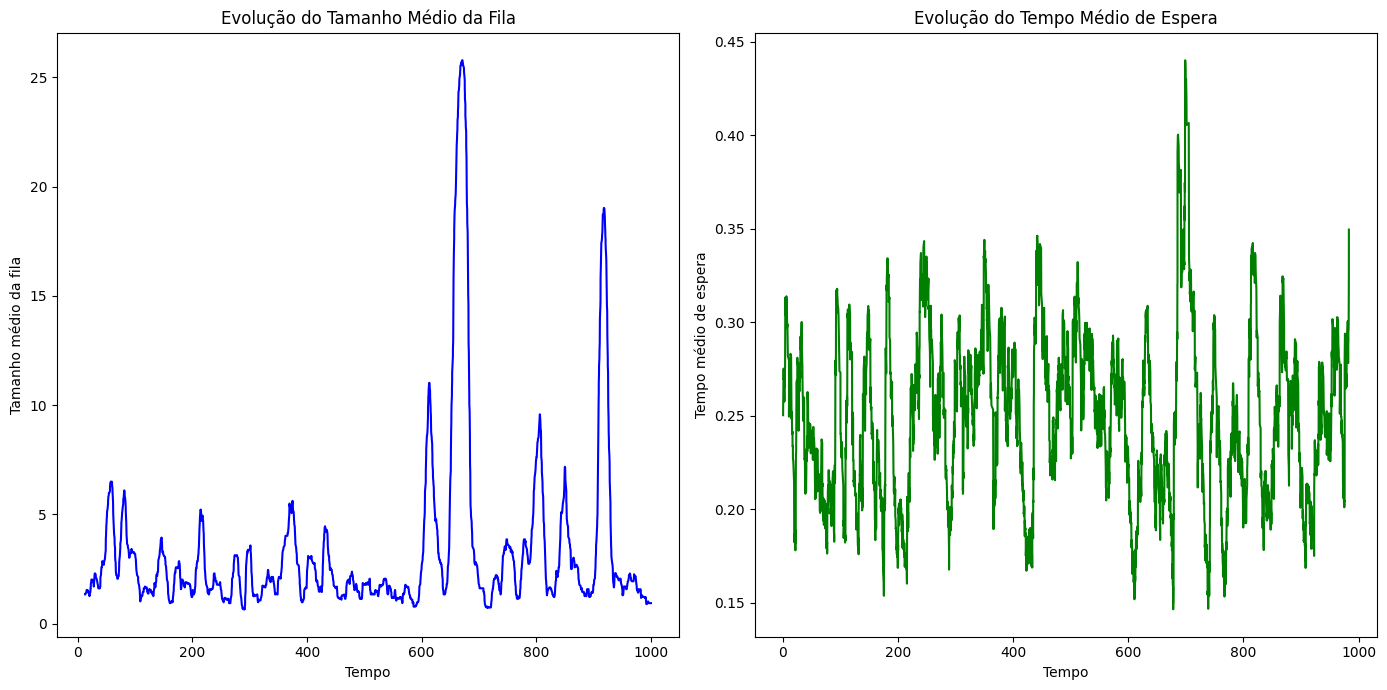

In [30]:
# Plotando os resultados
plt.figure(figsize=(14, 7))

# Plot do tamanho médio da fila ao longo do tempo
plt.subplot(1, 2, 1)
plt.plot(times_for_plot, avg_queue_length, color='blue')
plt.title('Evolução do Tamanho Médio da Fila')
plt.xlabel('Tempo')
plt.ylabel('Tamanho médio da fila')

# Plot do tempo médio de espera ao longo do tempo
times_for_wait_times = times[1:1+len(avg_wait_times)]
plt.subplot(1, 2, 2)
plt.plot(times_for_wait_times, avg_wait_times, color='green')
plt.title('Evolução do Tempo Médio de Espera')
plt.xlabel('Tempo')
plt.ylabel('Tempo médio de espera')

plt.tight_layout()
plt.show()


b. *Quantas iterações são necessárias para atingir uma convergência com erro inferior a 10^-4.*

In [31]:
# Parâmetros da fila M/M/1
lambda_rate = 2.0
mu_rate = 3.0
threshold = 1e-4
max_iterations = 1000000


In [32]:
# Variáveis de estado da simulação
num_in_system = 0
total_time_in_system = 0.0
num_arrivals = 0

# Variáveis de controle para convergência
iteration = 0
last_L = 0
last_W = 0
converged = False


In [33]:
# Simulação principal
while not converged and iteration < max_iterations:
    arrival_time = np.random.exponential(1.0 / lambda_rate)
    service_time = np.random.exponential(1.0 / mu_rate)

    # Atualizar o número total de clientes e o tempo total no sistema
    num_in_system += 1
    num_arrivals += 1
    total_time_in_system += (num_in_system * arrival_time)
    num_in_system -= 1  # Assume que o serviço é concluído imediatamente

    # Calcular novas médias
    L = total_time_in_system / (num_arrivals * arrival_time)
    W = total_time_in_system / num_arrivals

    # Verificar se as médias convergiram para dentro do limite de erro
    if abs(L - last_L) < threshold and abs(W - last_W) < threshold:
        converged = True
    else:
        last_L = L
        last_W = W
        iteration += 1


if converged:
    print(f"Convergência alcançada após {iteration} iterações.")
    print(f"Estimativa de L: {L}")
    print(f"Estimativa de W: {W}")
else:
    print("Não convergiu dentro do número máximo de iterações.")


Convergência alcançada após 11270 iterações.
Estimativa de L: 1.4432279446073044
Estimativa de W: 0.50478878655019


2. *Implemente a fila M/M/c, em que o número de atendentes é uma constante c.*

a. *Utilize um gráfico para mostrar a evolução de pessoas na fila e em atendimento.*

In [34]:
# Parâmetros da fila M/M/c
lambda_rate = 2.0
mu_rate = 3.0
c = 2
sim_time = 1000


In [35]:
# Variáveis para rastrear o estado da fila
num_in_queue = 0
num_being_served = 0
queue_over_time = []
being_served_over_time = []

# Eventos de chegada e atendimento
next_arrival = expon.rvs(scale=1/lambda_rate)
next_departures = [np.inf] * c

In [36]:
def next_event_time(rate):
    return expon.rvs(scale=1/rate)

def find_next_departure():
    return min(next_departures)


In [37]:
current_time = 0
while current_time < sim_time:
    if next_arrival < find_next_departure():
        current_time = next_arrival
        if num_being_served < c:
            next_departures[num_being_served] = current_time + next_event_time(mu_rate)
            num_being_served += 1
        else:
            num_in_queue += 1
        next_arrival = current_time + next_event_time(lambda_rate)
    else:
        current_time = find_next_departure()
        if num_in_queue > 0:
            next_departures[next_departures.index(find_next_departure())] = current_time + next_event_time(mu_rate)
            num_in_queue -= 1
        else:
            next_departures[next_departures.index(find_next_departure())] = np.inf
            num_being_served -= 1

    queue_over_time.append(num_in_queue)
    being_served_over_time.append(num_being_served)


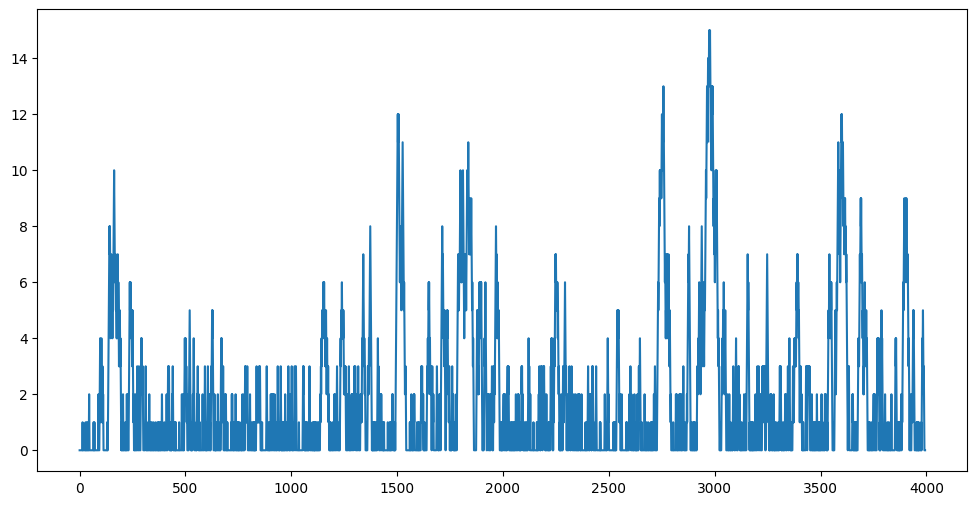

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(queue_over_time, label='Pessoas na fila')


b. *A taxa de utilização é a proporção de tempo em que o atendente passa em atendimento. Calcule a taxa de utilização para uma taxa de chegada λ = 5 e taxas de atendimento µ1 = 1, µ2 = 2 e µ3 = 3.*

In [39]:
# Definir parâmetros da fila M/M/c
lambda_rate = 5.0
mu_rates = [1.0, 2.0, 3.0]
c = len(mu_rates)

# Calcular a taxa de utilização para cada atendente
utilization_rates = [lambda_rate / (c * mu) for mu in mu_rates]

# Imprimir as taxas de utilização
for i, utilization in enumerate(utilization_rates, start=1):
    print(f"Taxa de utilização do atendente µ{i} = {utilization:.2f}")


Taxa de utilização do atendente µ1 = 1.67
Taxa de utilização do atendente µ2 = 0.83
Taxa de utilização do atendente µ3 = 0.56


3. *Adapte o modelo de fila M/M/1 para o caso de atendimento prioritário, ou seja, há dois tipos de clientes: normal ou prioritário. Caso haja algum cliente prioritário na fila, ele deve ser atendido antes de qualquer outro cliente normal, em ordem de chegada.*

In [40]:
# Parâmetros da fila M/M/1
lambda_rate_normal = 3.0
lambda_rate_priority = 2.0
mu_rate = 4.0
sim_time = 1000


In [41]:
# Filas para clientes normais e prioritários
queue_normal = queue.Queue()
queue_priority = queue.Queue()

# Variáveis para rastrear o estado da simulação
num_in_system = 0
times = []
num_in_queue_normal = []
num_in_queue_priority = []


In [42]:
def generate_arrival(rate):
    return np.random.exponential(1.0 / rate)

def generate_service():
    return np.random.exponential(1.0 / mu_rate)


In [43]:
# Eventos de chegada e atendimento
next_arrival_normal = generate_arrival(lambda_rate_normal)
next_arrival_priority = generate_arrival(lambda_rate_priority)
next_departure = float('inf')

# Executar a simulação
current_time = 0
while current_time < sim_time:
    # Determinar o próximo evento
    next_event_time = min(next_arrival_normal, next_arrival_priority, next_departure)

    # Atualizar o tempo atual
    current_time = next_event_time

    # Chegada de um cliente normal
    if current_time == next_arrival_normal:
        queue_normal.put(current_time)
        next_arrival_normal = current_time + generate_arrival(lambda_rate_normal)

    # Chegada de um cliente prioritário
    if current_time == next_arrival_priority:
        queue_priority.put(current_time)
        next_arrival_priority = current_time + generate_arrival(lambda_rate_priority)

    # Atendimento ao cliente
    if current_time == next_departure:
        if not queue_priority.empty():
            queue_priority.get()
        elif not queue_normal.empty():
            queue_normal.get()
        else:
            next_departure = float('inf')  # Não há cliente para atender

    # Iniciar atendimento se o atendente estiver livre e houver cliente esperando
    if next_departure == float('inf') and (not queue_priority.empty() or not queue_normal.empty()):
        next_departure = current_time + generate_service()

    # Atualizar estatísticas
    num_in_queue_normal.append(queue_normal.qsize())
    num_in_queue_priority.append(queue_priority.qsize())
    times.append(current_time)


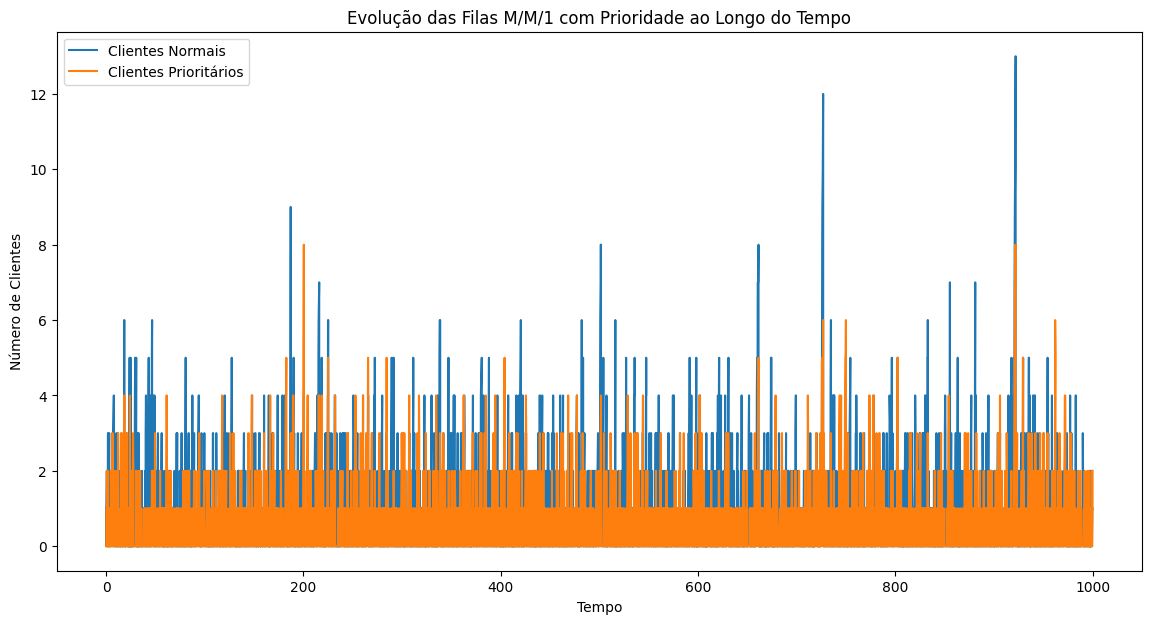

In [44]:
# Plotando a evolução das filas ao longo do tempo
plt.figure(figsize=(14, 7))
plt.plot(times, num_in_queue_normal, label='Clientes Normais')
plt.plot(times, num_in_queue_priority, label='Clientes Prioritários')
plt.xlabel('Tempo')
plt.ylabel('Número de Clientes')
plt.title('Evolução das Filas M/M/1 com Prioridade ao Longo do Tempo')
plt.legend()
plt.show()


4. *Considerando o modelo M/M/1/K, onde existe um limite K para o número de pessoas no sistema, pessoas adicionais que chegarem enquanto o sistema estiver cheio uma pessoa pode tentar acesso-lo e ser bloqueado. Chamamos isso de rejeição.*

a. *Adapte o modelo de fila M/M/1 para M/M/1/K e avalie a evolução do número de rejeições com λ = 3, µ = 3 e K = 10.*

In [47]:
def erlang_b_formula(arrival_rate, service_rate, K):
    """
    Calcula a probabilidade de rejeição no modelo M/M/1/K usando a fórmula de Erlang B.

    Parâmetros:
    arrival_rate (float): taxa de chegada (λ) dos clientes.
    service_rate (float): taxa de serviço (μ) do servidor.
    K (int): capacidade máxima do sistema.

    Retorna:
    float: probabilidade de rejeição.
    """
    rho = arrival_rate / service_rate
    erlangB = (rho**K / factorial(K)) / sum(rho**n / factorial(n) for n in range(K + 1))
    return erlangB

In [48]:
# Definindo os parâmetros do sistema M/M/1/K
lambda_rate = 2
mu_rate = 3
K = 5

In [49]:
rejection_probability = erlang_b_formula(lambda_rate, mu_rate, K)
print(f"A probabilidade de rejeição é: {rejection_probability}")

A probabilidade de rejeição é: 0.000563459642203127


b. *É possível deduzir um valor teórico para o número médio de rejeições em um sistema estável?*

In [50]:
def calculate_expected_rejections(arrival_rate, rejection_probability, time_period):
    """
    Calcula o número médio teórico de rejeições em um sistema M/M/1/K estável
    durante um determinado período de tempo.

    Parâmetros:
    arrival_rate (float): taxa de chegada de clientes (λ).
    rejection_probability (float): probabilidade de rejeição (P_rejeição).
    time_period (float): período de tempo durante o qual calcular as rejeições.

    Retorna:
    float: número médio esperado de rejeições durante o período de tempo.
    """
    expected_rejections_per_unit_time = arrival_rate * rejection_probability
    return expected_rejections_per_unit_time * time_period


In [51]:
time_period_in_hours = 1

In [52]:
expected_rejections = calculate_expected_rejections(lambda_rate, rejection_probability, time_period_in_hours)
expected_rejections

0.001126919284406254

5. *Adapte o modelo M/M/c para implementar um modelo em que a política de atendimento é escolher aleatoriamente um indivíduo na fila (não necessariamente o primeiro da fila). Em que casos reais isto pode ocorrer? Qual a vantagem de um sistema neste formato?*

In [103]:
class RandomSelectionQueue:
    def __init__(self, num_servers, arrival_rate, service_rate):
        self.num_servers = num_servers
        self.arrival_rate = arrival_rate
        self.service_rate = service_rate
        self.queue = []
        self.servers_available = num_servers
        self.customers_served = 0
        self.customers_rejected = 0

In [98]:
    def simulate(self, total_time):
        current_time = 0
        while current_time < total_time:
            # Simula a chegada do próximo cliente
            arrival_time = current_time + np.random.exponential(1 / self.arrival_rate)
            if arrival_time < total_time:
                self.handle_arrival(arrival_time)

            # Simula o atendimento do cliente
            if self.servers_available < self.num_servers and self.queue:
                self.handle_departure(current_time)

            current_time = arrival_time

        return self.customers_served, self.customers_rejected

In [99]:
    def handle_arrival(self, arrival_time):
        if self.servers_available > 0:
            self.servers_available -= 1
            self.customers_served += 1
            # Adiciona o cliente que será atendido à fila
            self.queue.append(arrival_time)
        else:
            self.customers_rejected += 1

In [100]:
   def handle_departure(self, current_time):
        # Escolhe um cliente aleatório da fila para ser atendido
        chosen_index = np.random.choice(len(self.queue))
        self.queue.pop(chosen_index)
        self.servers_available += 1

In [101]:
num_servers = 3
arrival_rate = 1  # clientes por unidade de tempo
service_rate = 0.5  # serviços por unidade de tempo
total_time = 60  # tempo total da simulação em unidades de tempo

In [102]:
queue_system = RandomSelectionQueue(num_servers, arrival_rate, service_rate)
customers_served, customers_rejected = queue_system.simulate(total_time)

In [104]:
print(f"Clientes atendidos: {customers_served}")
print(f"Clientes rejeitados: {customers_rejected}")


Clientes atendidos: 63
Clientes rejeitados: 0


####Casos Reais Onde a Seleção Aleatória é Utilizada:
* Sorteios e Promoções: Onde todos os participantes têm uma chance igual de serem selecionados.

* Pesquisas e Estudos de Mercado: Selecionando aleatoriamente indivíduos para participação em pesquisas para garantir uma amostra representativa.

* Atendimento em Pronto-Socorro: Em alguns casos, especialmente em situações de triagem onde todos os pacientes têm a mesma prioridade de atendimento.


####Vantagens de um Sistema com Seleção Aleatória:
* Equidade: Todos os clientes têm a mesma chance de serem atendidos, o que pode ser percebido como mais justo em certos contextos.

* Simplicidade: Em certos cenários, pode ser mais simples selecionar um cliente aleatoriamente do que manter uma ordem rigorosa de chegada.

* Redução de Viés: Pode evitar favorecimento inadvertido de certos clientes baseado na ordem de chegada.

* Aplicações Específicas: Pode ser vantajoso em situações onde a ordem de atendimento não precisa seguir uma fila, como em alguns tipos de jogos ou atividades lúdicas.